# U.S. Geological Survey (USGS): Geographic Names Information System (GNIS) dataset


For a theoretical overview of GNIS dataset see documentation, from the main repository directory: `Documentation/GNIS_2020.md`

In [1]:
import pandas as pd
data = pd.read_csv('../../airflow/tmp_data/NationalFile_20200301.txt',sep="|")
data

,FEATURE_ID,FEATURE_NAME,FEATURE_CLASS,STATE_ALPHA,STATE_NUMERIC,COUNTY_NAME,COUNTY_NUMERIC,PRIMARY_LAT_DMS,PRIM_LONG_DMS,PRIM_LAT_DEC,PRIM_LONG_DEC,SOURCE_LAT_DMS,SOURCE_LONG_DMS,SOURCE_LAT_DEC,SOURCE_LONG_DEC,ELEV_IN_M,ELEV_IN_FT,MAP_NAME,DATE_CREATED,DATE_EDITED
0,399,Agua Sal Creek,Stream,AZ,4,Apache,1.0,362740N,1092842W,36.461112,-109.478439,362053N,1090915W,36.348058,-109.154266,1645.0,5397.0,Fire Dance Mesa,02/08/1980,NaN
1,400,Agua Sal Wash,Valley,AZ,4,Apache,1.0,363246N,1093103W,36.546112,-109.517607,362740N,1092842W,36.461112,-109.478439,1597.0,5239.0,Little Round Rock,02/08/1980,NaN
2,401,Aguaje Draw,Valley,AZ,4,Apache,1.0,343417N,1091313W,34.571428,-109.220370,344308N,1085826W,34.718800,-108.973900,1750.0,5741.0,Kearn Lake,02/08/1980,01/14/2008
3,402,Arlington State Wildlife Area,Park,AZ,4,Maricopa,13.0,331455N,1124625W,33.248655,-112.773504,NaN,NaN,NaN,NaN,231.0,758.0,Spring Mountain,02/08/1980,NaN
4,403,Bar X Wash,Stream,AZ,4,Graham,9.0,322815N,1095610W,32.470904,-109.936185,323048N,1095233W,32.513402,-109.875907,1339.0,4393.0,West of Greasewood Mountain,02/08/1980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287226,27833615,Pinon Hills Post Office,Post Office,CA,6,San Bernardino,71.0,342618N,1173832W,34.438460,-117.642302,NaN,NaN,NaN,NaN,1242.0,4075.0,Mescal Creek,02/08/2018,02/21/2018
2287227,27833616,Yermo Post Office,Post Office,CA,6,San Bernardino,71.0,345413N,1164935W,34.903735,-116.826404,NaN,NaN,NaN,NaN,589.0,1932.0,Yermo,02/08/2018,04/22/2019
2287228,27833617,Federal Covina Post Office,Post Office,CA,6,Los Angeles,37.0,340514N,1175318W,34.087203,-117.888233,NaN,NaN,NaN,NaN,169.0,554.0,Baldwin Park,02/08/2018,NaN
2287229,27833618,Montalvo Post Office,Post Office,CA,6,Ventura,111.0,341505N,1191226W,34.251525,-119.207255,NaN,NaN,NaN,NaN,33.0,108.0,Saticoy,02/08/2018,NaN


# EDA

## Case 1: Missing data

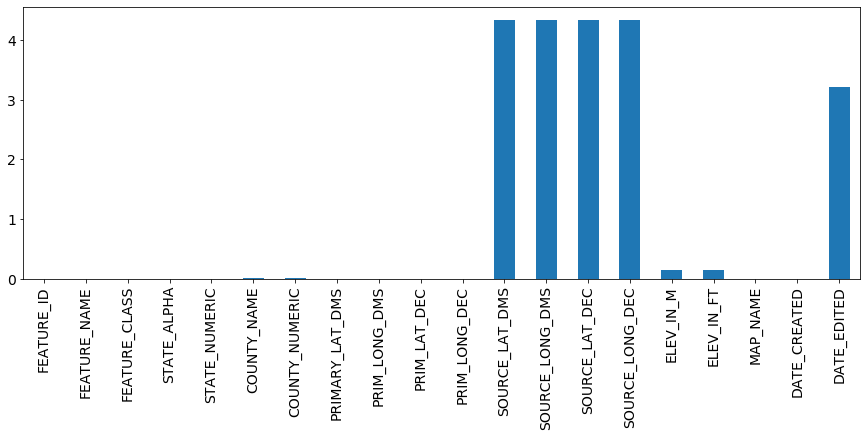

In [2]:
# How many NA values we have per column in % PERCENTAGES


import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,5))
NAs_per_column = data.isna().sum()
NAs_per_column_norm = NAs_per_column*100/data.size
NAs_per_column_norm.plot(kind='bar',logy=False)

ax.tick_params(axis='both', which='major', labelsize=14)
 

#NAs_per_column.plot(kind='bar',logy=True)

## Case 2: duplicates

### duplicate rows

In [3]:
# Basic check
    # No entry should be duplicated
assert data[data.duplicated()].size==0

### duplicate FEATURE_IDs

In [4]:
# less general basic check: 
    # no global event ID should be duplicated (for a given date)
assert data[data.duplicated(['FEATURE_ID','FEATURE_NAME'])].size == 0

AssertionError: 

**Data source has multiple entries for many `FEATURE_ID` columns.**

For example for `FEATURE_ID=575984` (below) it is not clear which entry should be kept, as they refer to multiple states, were added at the same time. 

Upon further inspection, FEATURE_ID can be duplicated, as the same FEATURE is defined present in multiple state, like a water reservoir. 

What is most important is that **no rows are duplicated**. 


In [5]:
data[data.duplicated(['FEATURE_ID'])]

,FEATURE_ID,FEATURE_NAME,FEATURE_CLASS,STATE_ALPHA,STATE_NUMERIC,COUNTY_NAME,COUNTY_NUMERIC,PRIMARY_LAT_DMS,PRIM_LONG_DMS,PRIM_LAT_DEC,PRIM_LONG_DEC,SOURCE_LAT_DMS,SOURCE_LONG_DMS,SOURCE_LAT_DEC,SOURCE_LONG_DEC,ELEV_IN_M,ELEV_IN_FT,MAP_NAME,DATE_CREATED,DATE_EDITED
38541,45605,Parker Canyon,Valley,SON,26,NaN,NaN,311900N,1103602W,31.316768,-110.600637,312750N,1102532W,31.463986,-110.425637,1399.0,4590.0,Lochiel,02/08/1980,12/10/2010
38543,45606,San Antonio Canyon,Valley,SON,26,NaN,NaN,311910N,1103732W,31.319546,-110.625637,312211N,1104334W,31.369722,-110.726111,1421.0,4662.0,Duquesne,02/08/1980,12/10/2010
38546,45608,Silver Creek,Stream,SON,26,NaN,NaN,311900N,1091632W,31.316771,-109.275616,313157N,1092403W,31.532598,-109.400898,1135.0,3724.0,San Bernardino Ranch,02/08/1980,12/10/2010
514164,575984,Spaulding Pond,Reservoir,ME,23,York,31.0,432244N,0705900W,43.378970,-70.983397,NaN,NaN,NaN,NaN,73.0,239.0,Milton,09/30/1980,NaN
514165,575984,Spaulding Pond,Reservoir,NH,33,Strafford,17.0,432244N,0705900W,43.378970,-70.983397,NaN,NaN,NaN,NaN,73.0,239.0,Milton,09/30/1980,NaN
514166,575984,Spaulding Pond,Reservoir,NH,33,York,31.0,432244N,0705900W,43.378970,-70.983397,NaN,NaN,NaN,NaN,73.0,239.0,Milton,09/30/1980,NaN
700262,774784,North Fork Milk River,Stream,MT,30,NaN,NaN,490814N,1122233W,49.137300,-112.375890,485411N,1131903W,48.902980,-113.317490,1083.0,3553.0,Unknown,04/04/1980,12/14/2010
700816,775339,Police Creek,Stream,MT,30,NaN,NaN,490753N,1110005W,49.131410,-111.001480,485818N,1110859W,48.971676,-111.149690,862.0,2828.0,Unknown,04/04/1980,12/14/2010
701596,776125,Saint Mary River,Stream,MT,30,NaN,NaN,493738N,1125313W,49.627280,-112.887010,483713N,1134437W,48.620200,-113.743620,835.0,2739.0,Unknown,04/04/1980,12/14/2010
703599,778142,Waterton River,Stream,MT,30,NaN,NaN,493146N,1131616W,49.529410,-113.271190,484947N,1135939W,48.829697,-113.994293,960.0,3150.0,Unknown,04/04/1980,12/14/2010
